In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def read_hvd(filename, arrlen=29):
    
    with open(filename, 'r') as f:
        content = f.read()

    arr = content.split(",")
    arr = arr[:-1]
    
    resultlen = len(arr)/arrlen
    
    result = {}
    y = []
    for i in range(arrlen):
        result[i] = 0

    for i in range(len(arr)):
        j = i % arrlen
        result[j] += float(arr[i])

    for i in range(arrlen):
        result[i] /= resultlen
        y.append(result[i])
    
    # 32-bit floating number (torch.float) is 4 byte
    x = [2**i * 4 for i in range(arrlen)]
    
    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')



In [11]:
def read_hvd2(filename):
    x = []
    y = []

    with open(filename) as f:
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

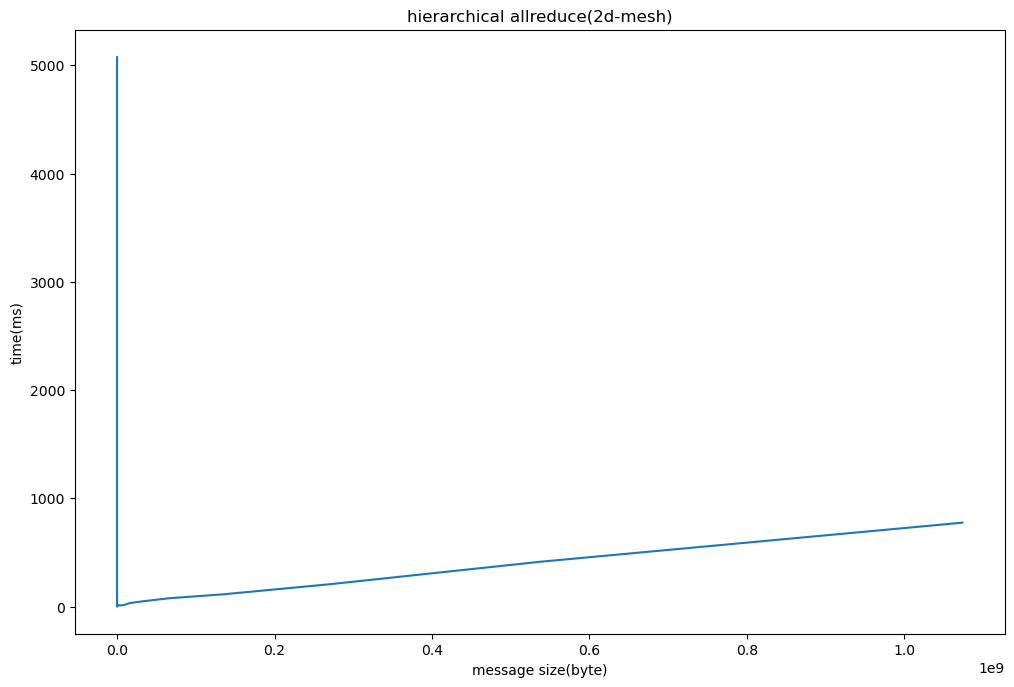

In [12]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
x, y = read_hvd("./data/horovod-results/15gpu/10g-15gpu-2dmesh.txt")
plt.plot(x,y)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reducescatter+mpi_allreduce+mpi_allgather
plt.title('hierarchical allreduce(2d-mesh)')
plt.show()

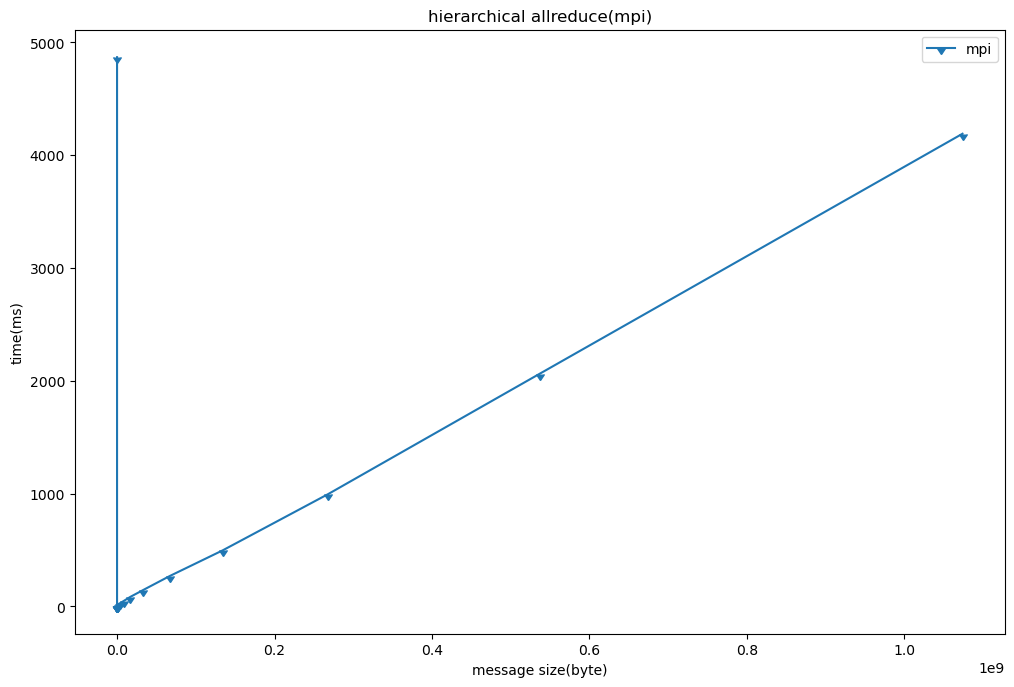

In [47]:

x1, y1 = read_hvd("./data/horovod-results/15gpu/10g-15gpu-mpi.txt")
# plt.plot(x,y, marker=11, label='h')
plt.plot(x1,y1, marker=11, label='mpi')
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('hierarchical allreduce(mpi)')
plt.show()

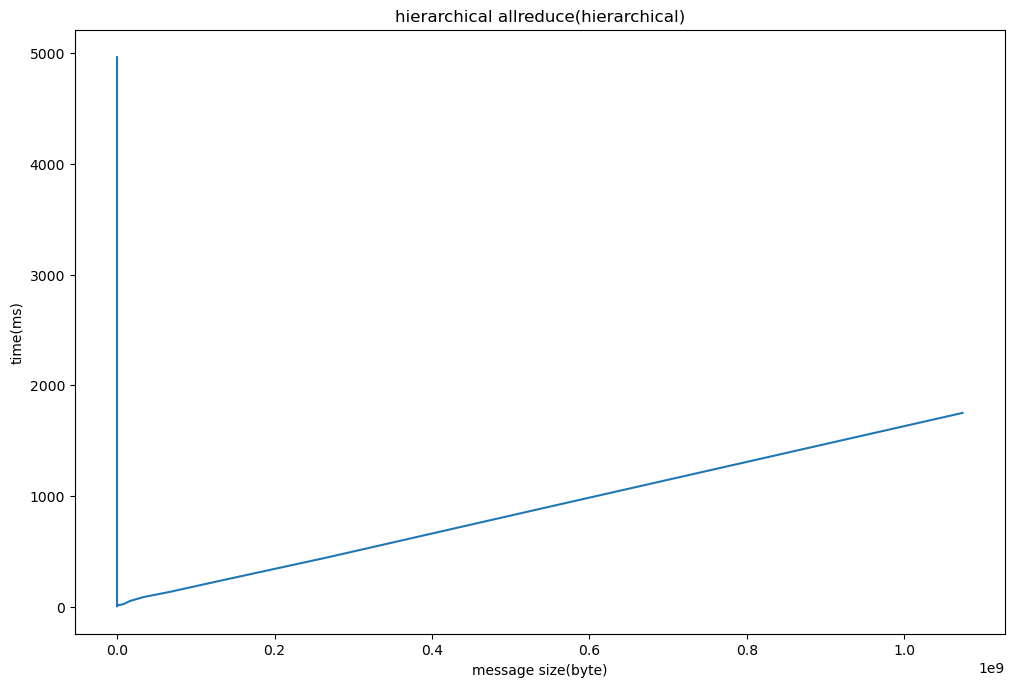

In [48]:

x2, y2 = read_hvd("./data/horovod-results/15gpu/10g-15gpu-h.txt")
plt.plot(x2,y2)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reduce+mpi_allreduce+nccl_bcast
plt.title('hierarchical allreduce(hierarchical)')
plt.show()

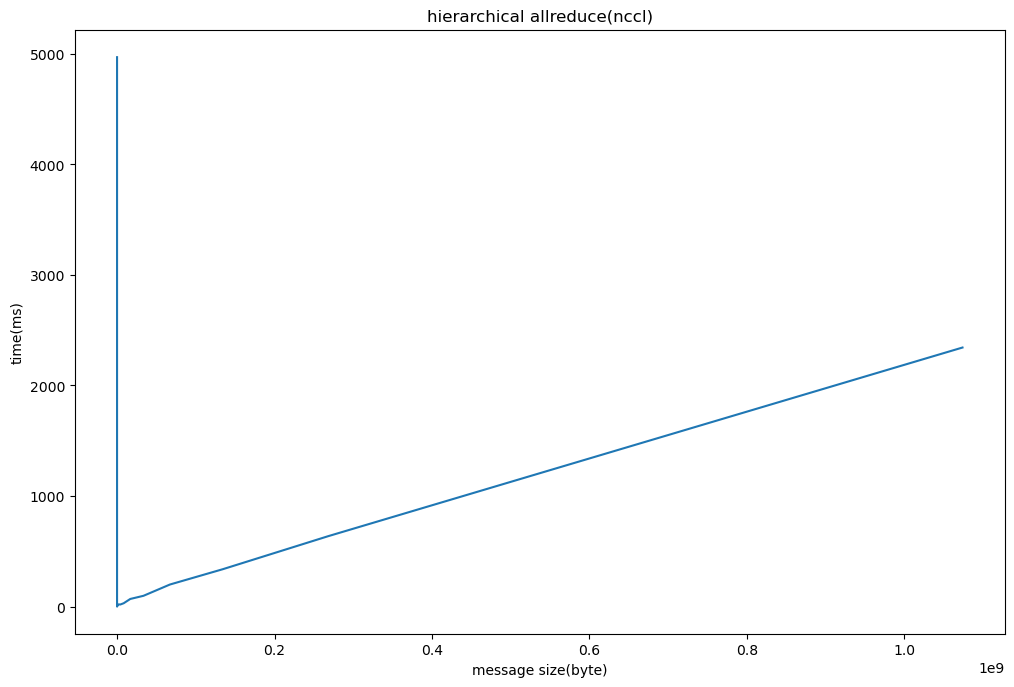

In [53]:
x3, y3 = read_hvd("./data/horovod-results/15gpu/10g-15gpu-nccl.txt")
plt.plot(x3,y3)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reduce+nccl_allreduce+nccl_bcast
plt.title('hierarchical allreduce(nccl)')
plt.show()

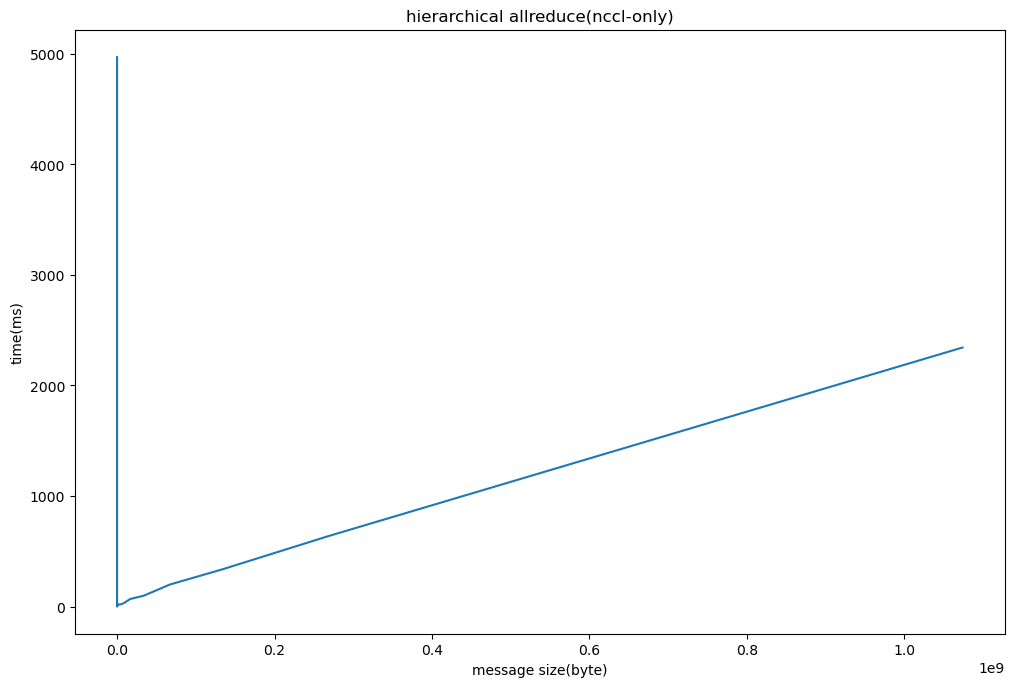

In [55]:
x4, y4 = read_hvd("./data/15gpu/10g-15gpu-nccl-only.txt")
plt.plot(x3,y3)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reduce+nccl_allreduce+nccl_bcast
plt.title('hierarchical allreduce(nccl-only)')
plt.show()

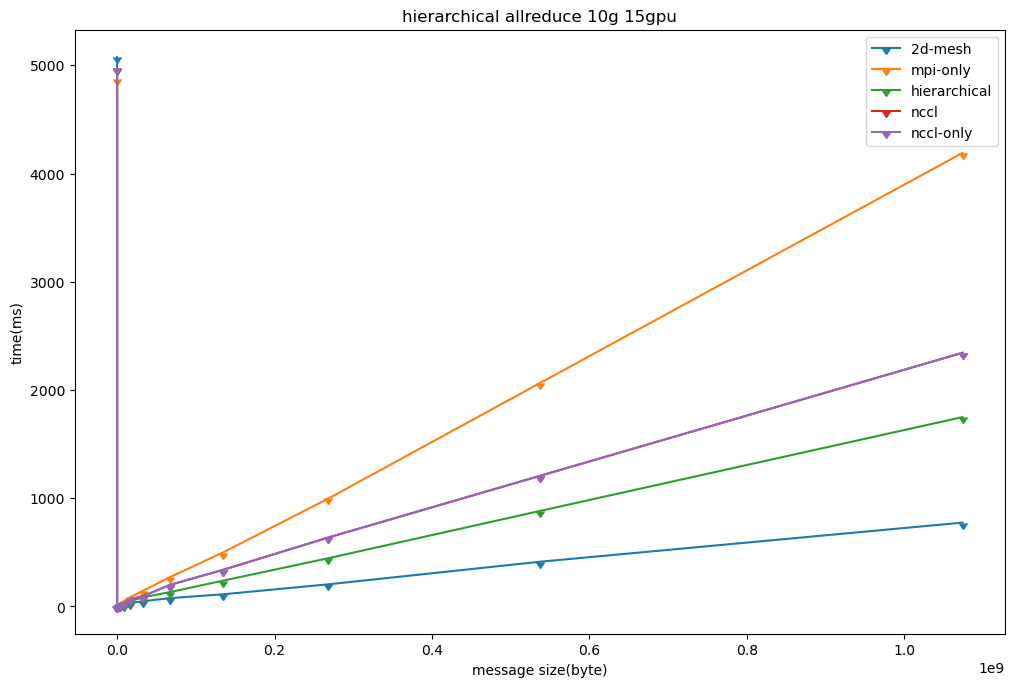

In [57]:
plt.plot(x,y, marker=11, label='2d-mesh')
plt.plot(x1,y1, marker=11, label='mpi-only')
plt.plot(x2,y2, marker=11, label='hierarchical')
plt.plot(x3,y3, marker=11, label='nccl')
plt.plot(x3,y3, marker=11, label='nccl-only')


plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('hierarchical allreduce 10g 15gpu')
plt.show()

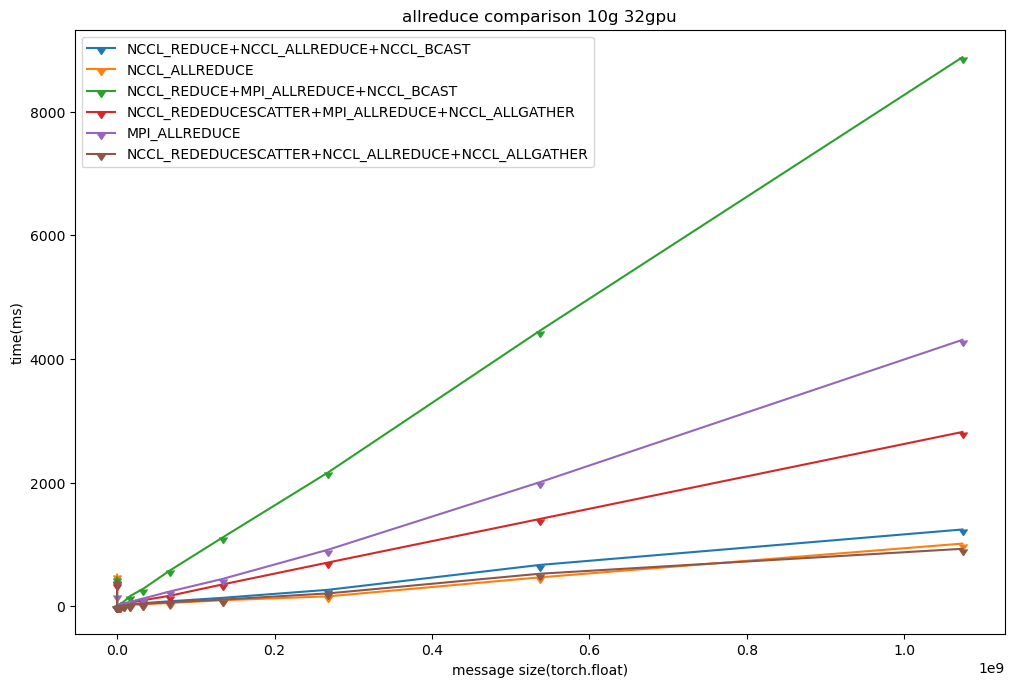

In [78]:
x1, y1 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-nccl.txt")
x2, y2 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-nccl-only.txt")
x3, y3 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-2dmesh-4.txt")
x4, y4 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-h-4.txt")
x5, y5 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-mpi.txt")
x6, y6 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-newnccl.txt")


plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_ALLREDUCE')
plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')


plt.xlabel('message size(torch.float)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 10g 32gpu')
plt.show()

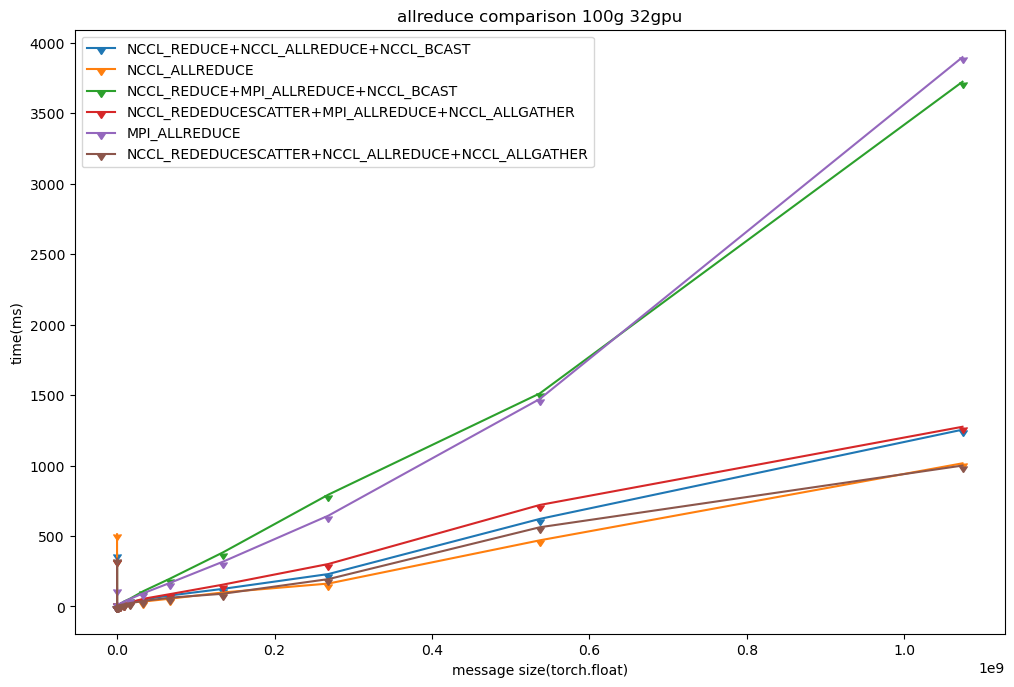

In [79]:
x1, y1 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-nccl.txt")
x2, y2 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-nccl-only.txt")
x3, y3 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-2dmesh-4.txt")
x4, y4 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-h-4.txt")
x5, y5 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-mpi.txt")
x6, y6 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-newnccl.txt")

plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_ALLREDUCE')
plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')


plt.xlabel('message size(torch.float)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 100g 32gpu')
plt.show()

In [5]:
def read_algo_with_head(filename,skipnum=3):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(skipnum):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')



def read_algo_skip_head(filename,skip_num=215):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(int(skip_num)):
            next(f)
    
        for line in f:
            if not line.startswith('#'):
                num = line.split()
                x.append(num[0])
                y.append(num[4])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')



[4.00000000e+00 8.00000000e+00 1.60000000e+01 3.20000000e+01
 6.40000000e+01 1.28000000e+02 2.56000000e+02 5.12000000e+02
 1.02400000e+03 2.04800000e+03 4.09600000e+03 8.19200000e+03
 1.63840000e+04 3.27680000e+04 6.55360000e+04 1.31072000e+05
 2.62144000e+05 5.24288000e+05 1.04857600e+06 2.09715200e+06
 4.19430400e+06 8.38860800e+06 1.67772160e+07 3.35544320e+07
 6.71088640e+07 1.34217728e+08 2.68435456e+08 5.36870912e+08
 1.07374182e+09] [41.14345814 26.37111846 35.42666744 47.61445464 35.70220729 46.9855248
 42.17434309 59.07261538 54.05396127 72.30536495 70.41206182 77.77611568
 66.08830407 60.57292654 65.86593808 67.13903077 56.76943914 78.87427607
 70.71195197 69.44565943 69.84772847 72.31548942 74.7669427  58.8069219
 64.157946   51.80610543 48.96406193 51.34548553 40.5725166 ]


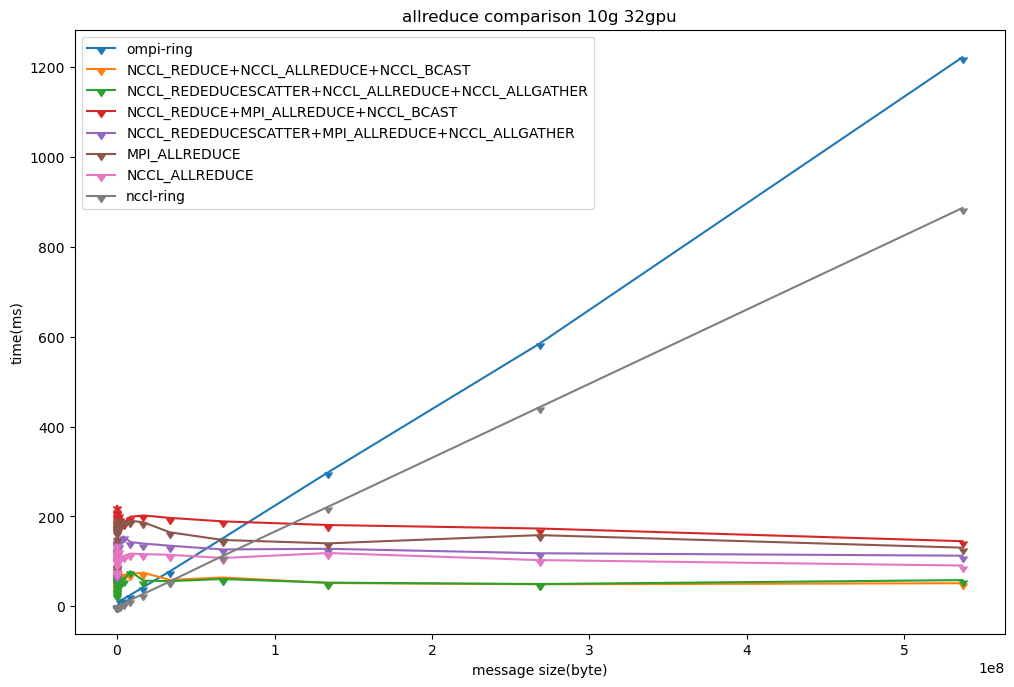

In [95]:
x, y = read_algo_with_head('data/ompi-32gpu-results/32gpus/10g/algo4-stepexp2.txt')
y = y * 1e-3 # convert us to ms # 1us=10^(-3)ms


x7, y7 = read_algo_skip_head('data/nccl-results/nccl-32gpus/10g-stepexp2-2.txt', 707)
y7 = y7 * 1e-3 # convert us to ms


x1, y1 = read_hvd("./data/horovod-results/32gpu/10g/nccl-slow.txt")

x2, y2 = read_hvd("./data/horovod-results/32gpu/10g/nccl-fast.txt")

x3, y3 = read_hvd("./data/horovod-results/32gpu/10g/mpi-slow.txt")
x4, y4 = read_hvd("./data/horovod-results/32gpu/10g/mpi-fast.txt")

x5, y5 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-mpi-2.txt")
x6, y6 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-ncclonly-2.txt")


x1 = x1[2:-1]
x2 = x2[2:-1]
x3 = x3[2:-1]
x4 = x4[2:-1]
x5 = x5[2:-1]
x6 = x6[2:-1]

y1 = y1[2:-1]
y2 = y2[2:-1]
y3 = y3[2:-1]
y4 = y4[2:-1]
y5 = y5[2:-1]
y6 = y6[2:-1]


plt.plot(x,y, marker=11, label='ompi-ring')
plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_ALLREDUCE')


plt.plot(x7,y7, marker=11, label='nccl-ring')


plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 10g 32gpu')
plt.show()



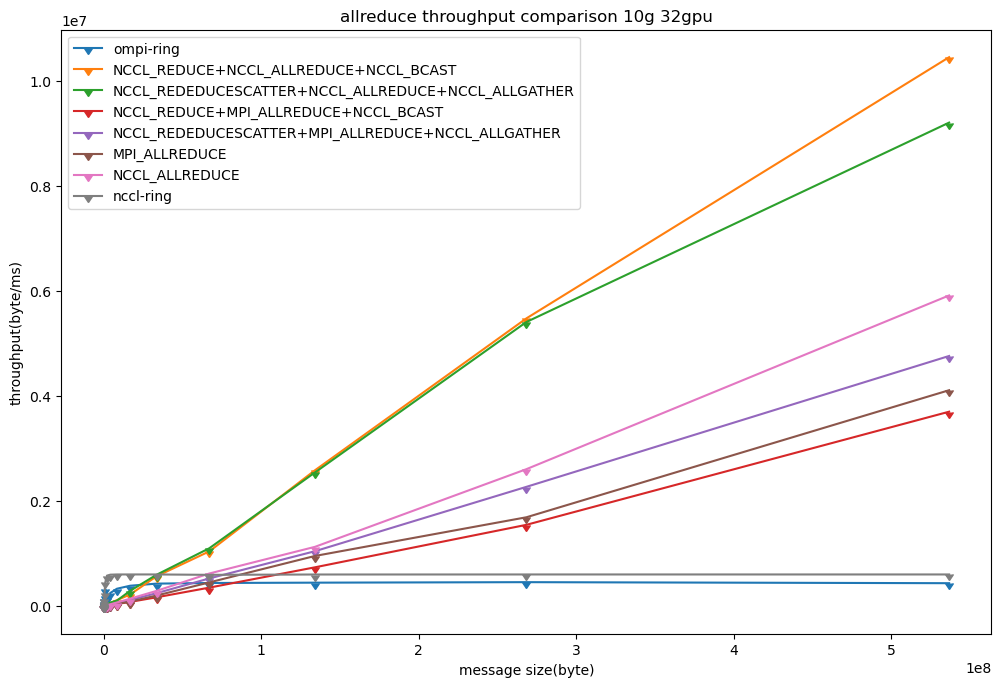

In [84]:
z = x/y 
z1 = x1/y1
z2 = x2/y2
z3 = x3/y3
z4 = x4/y4
z5 = x5/y5
z6 = x6/y6
z7 = x7/y7

plt.plot(x,z, marker=11, label='ompi-ring')

plt.plot(x1,z1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,z2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,z3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,z4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,z5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,z6, marker=11, label='NCCL_ALLREDUCE')

plt.plot(x7,z7, marker=11, label='nccl-ring')


plt.xlabel('message size(byte)')
plt.ylabel('throughput(byte/ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce throughput comparison 10g 32gpu')
plt.show()



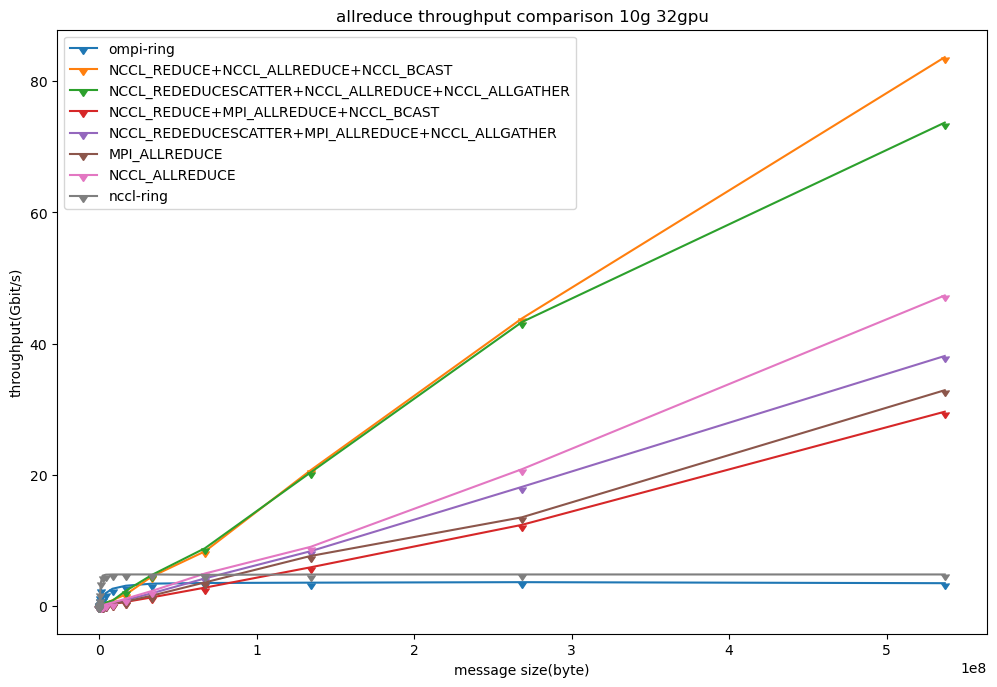

In [85]:
z = z * 8 * 1e-6
z1 = z1 * 8 * 1e-6
z2 = z2 * 8 * 1e-6
z3 = z3 * 8 * 1e-6
z4 = z4 * 8 * 1e-6
z5 = z5 * 8 * 1e-6
z6 = z6 * 8 * 1e-6
z7 = z7 * 8 * 1e-6

plt.plot(x,z, marker=11, label='ompi-ring')

plt.plot(x1,z1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,z2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,z3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,z4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x5,z5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,z6, marker=11, label='NCCL_ALLREDUCE')

plt.plot(x7,z7, marker=11, label='nccl-ring')




plt.xlabel('message size(byte)')
plt.ylabel('throughput(Gbit/s)')
plt.legend()
# mpi_allreduce
plt.title('allreduce throughput comparison 10g 32gpu')
plt.show()

In [86]:
print('ompi-ring throughput(GBit/s)', z[-1])
print('nccl-slow throughput(GBit/s)', z1[-1])
print('nccl-fast throughput(GBit/s)', z2[-1])
print('mpi-slow throughput(GBit/s)', z3[-1])
print('mpi-fast throughput(GBit/s)', z4[-1])
print('mpi-only throughput(GBit/s)', z5[-1])
print('nccl-only throughput(GBit/s)', z6[-1])
print('nccl-tests throughput(GBit/s)', z7[-1])



ompi-ring throughput(GBit/s) 3.515279095642346
nccl-slow throughput(GBit/s) 83.64839190983861
nccl-fast throughput(GBit/s) 73.68375261148128
mpi-slow throughput(GBit/s) 29.642180782929934
mpi-fast throughput(GBit/s) 38.13031510001667
mpi-only throughput(GBit/s) 32.91436104783701
nccl-only throughput(GBit/s) 47.35230799796505
nccl-tests throughput(GBit/s) 4.845935640520228


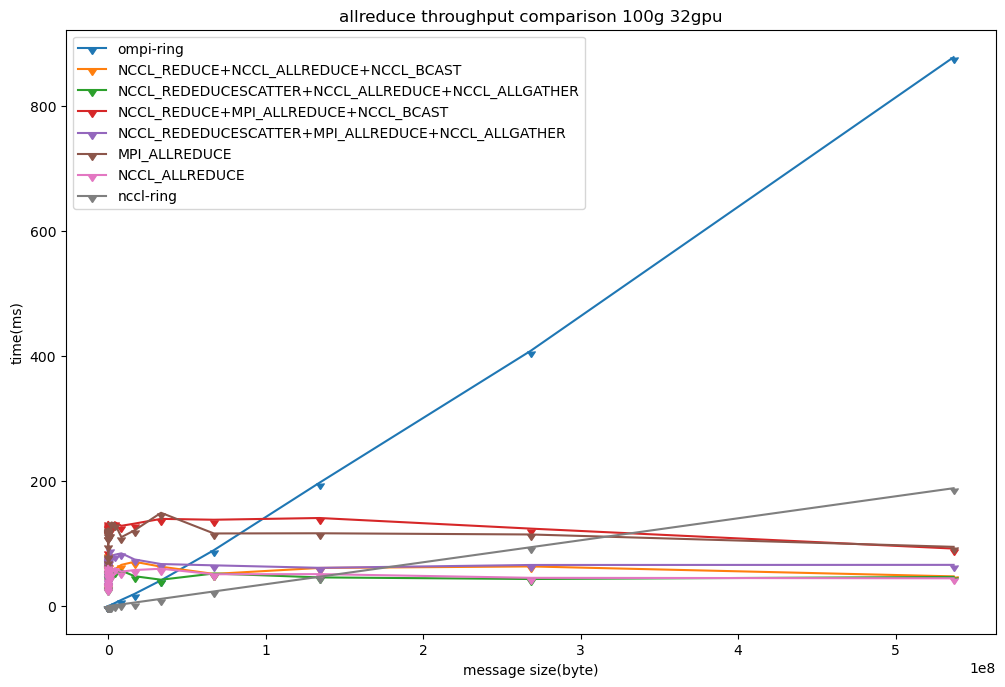

In [91]:
x, y = read_algo_with_head('./data/ompi-32gpu-results/32gpus/100g/algo4-stepexp2.txt')
y = y * 1e-3


x1, y1 = read_hvd("./data/horovod-results/32gpu/100g/nccl-slow.txt")
x2, y2 = read_hvd("./data/horovod-results/32gpu/100g/nccl-fast.txt")

x3, y3 = read_hvd("./data/horovod-results/32gpu/100g/mpi-slow.txt")
x4, y4 = read_hvd("./data/horovod-results/32gpu/100g/mpi-fast.txt")

x5, y5 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-mpi-2.txt")
x6, y6 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-ncclonly-2.txt")

x7, y7 = read_algo_skip_head('data/nccl-results/nccl-32gpus/100g-stepexp2-2.txt', 723)
y7 = y7 * 1e-3

x1 = x1[2:-1]
x2 = x2[2:-1]
x3 = x3[2:-1]
x4 = x4[2:-1]
x5 = x5[2:-1]
x6 = x6[2:-1]

y1 = y1[2:-1]
y2 = y2[2:-1]
y3 = y3[2:-1]
y4 = y4[2:-1]
y5 = y5[2:-1]
y6 = y6[2:-1]




plt.plot(x,y, marker=11, label='ompi-ring')
plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_ALLREDUCE')

plt.plot(x7,y7, marker=11, label='nccl-ring')




plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce throughput comparison 100g 32gpu')
plt.show()

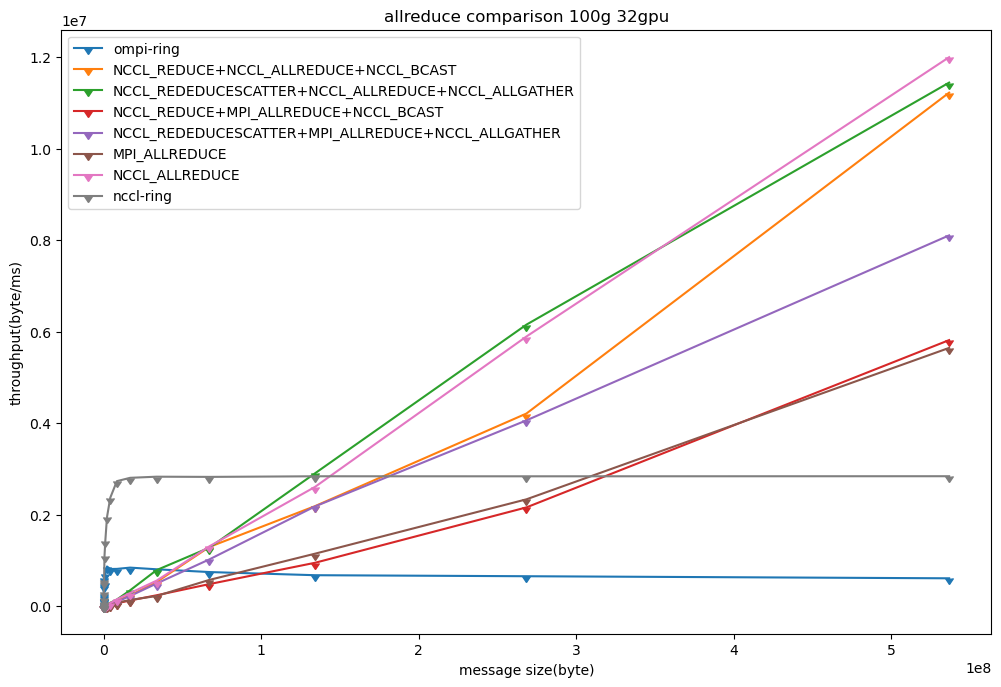

In [92]:
z = x/y
z1 = x1/y1
z2 = x2/y2
z3 = x3/y3
z4 = x4/y4
z5 = x5/y5
z6 = x6/y6
z7 = x7/y7

plt.plot(x,z, marker=11, label='ompi-ring')
plt.plot(x1,z1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,z2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,z3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,z4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x5,z5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,z6, marker=11, label='NCCL_ALLREDUCE')

plt.plot(x7,z7, marker=11, label='nccl-ring')


plt.xlabel('message size(byte)')
plt.ylabel('throughput(byte/ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 100g 32gpu')
plt.show()

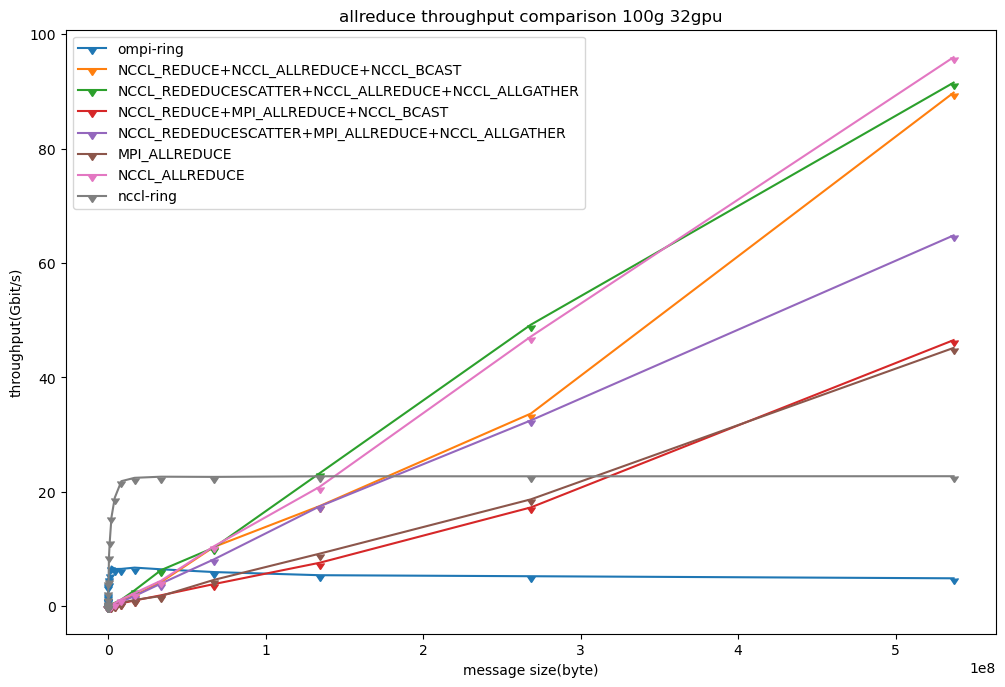

In [93]:
z = z * 8 * 1e-6
z1 = z1 * 8 * 1e-6
z2 = z2 * 8 * 1e-6
z3 = z3 * 8 * 1e-6
z4 = z4 * 8 * 1e-6
z5 = z5 * 8 * 1e-6
z6 = z6 * 8 * 1e-6
z7 = z7 * 8 * 1e-6

plt.plot(x,z, marker=11, label='ompi-ring')

plt.plot(x1,z1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,z2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,z3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,z4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x5,z5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,z6, marker=11, label='NCCL_ALLREDUCE')

plt.plot(x7,z7, marker=11, label='nccl-ring')




plt.xlabel('message size(byte)')
plt.ylabel('throughput(Gbit/s)')
plt.legend()
# mpi_allreduce
plt.title('allreduce throughput comparison 100g 32gpu')
plt.show()

In [94]:
print('ompi-ring throughput(GBit/s)', z[-1])
print('nccl-slow throughput(GBit/s)', z1[-1])
print('nccl-fast throughput(GBit/s)', z2[-1])
print('mpi-slow throughput(GBit/s)', z3[-1])
print('mpi-fast throughput(GBit/s)', z4[-1])
print('mpi-only throughput(GBit/s)', z5[-1])
print('nccl-only throughput(GBit/s)', z6[-1])
print('nccl-tests throughput(GBit/s)', z7[-1])


ompi-ring throughput(GBit/s) 4.8887155350186715
nccl-slow throughput(GBit/s) 89.79474415203279
nccl-fast throughput(GBit/s) 91.54927369148078
mpi-slow throughput(GBit/s) 46.53198942102174
mpi-fast throughput(GBit/s) 64.83982815094492
mpi-only throughput(GBit/s) 45.16963215828789
nccl-only throughput(GBit/s) 95.99430765740352
nccl-tests throughput(GBit/s) 22.73516007897815


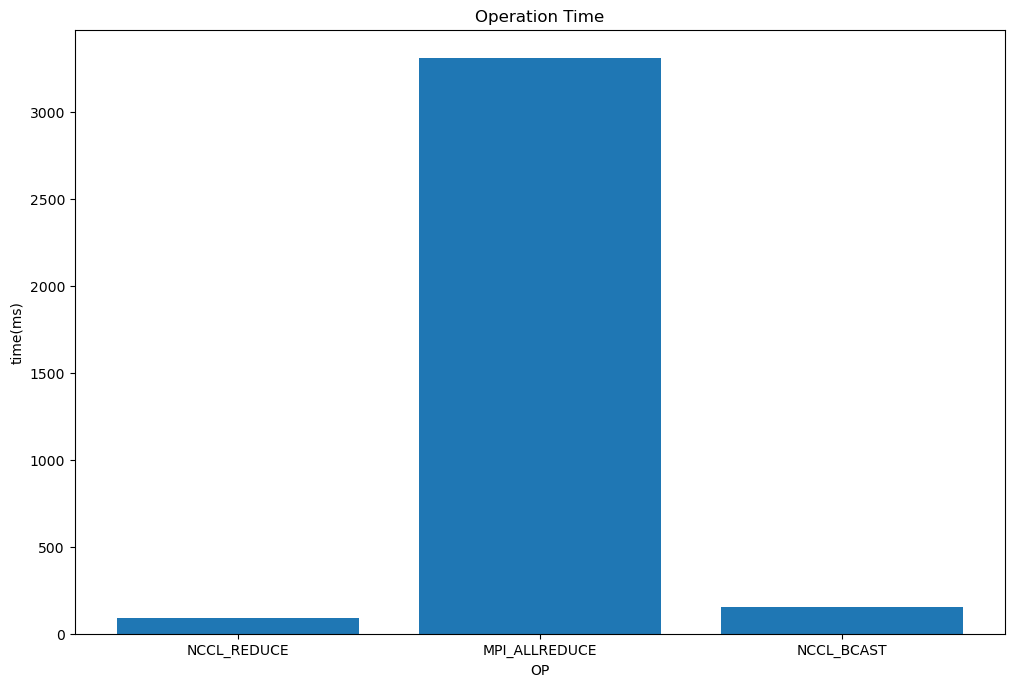

In [83]:
ops = ['NCCL_REDUCE', 'MPI_ALLREDUCE', 'NCCL_BCAST']
t = [88.690, 3308.915, 153.625]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()

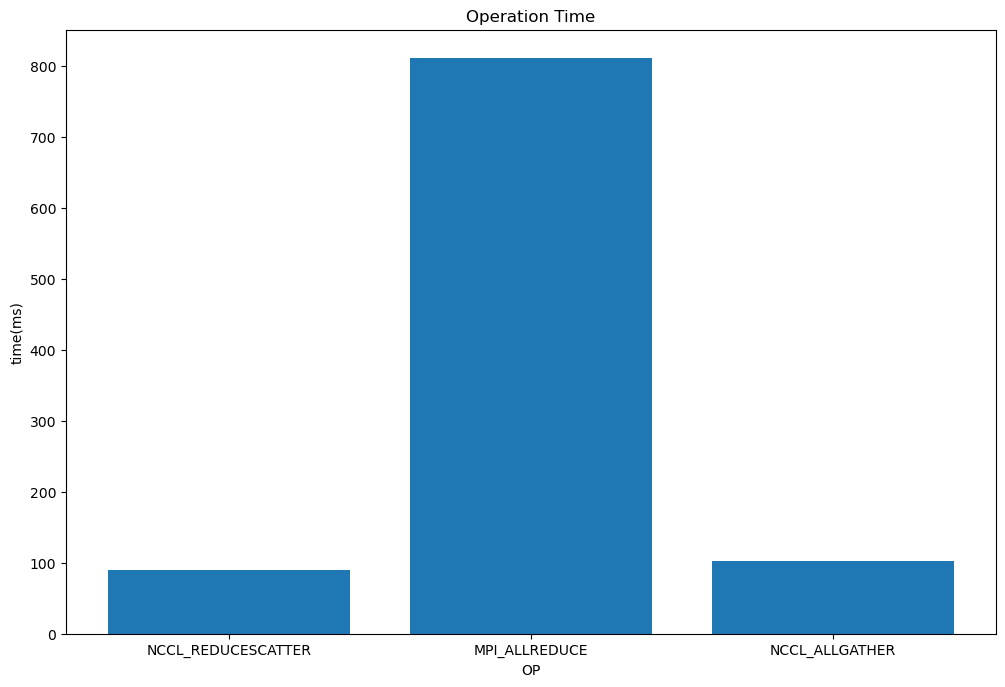

In [84]:
ops = ['NCCL_REDUCESCATTER', 'MPI_ALLREDUCE', 'NCCL_ALLGATHER']
t = [90.324, 810.733, 101.798]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()

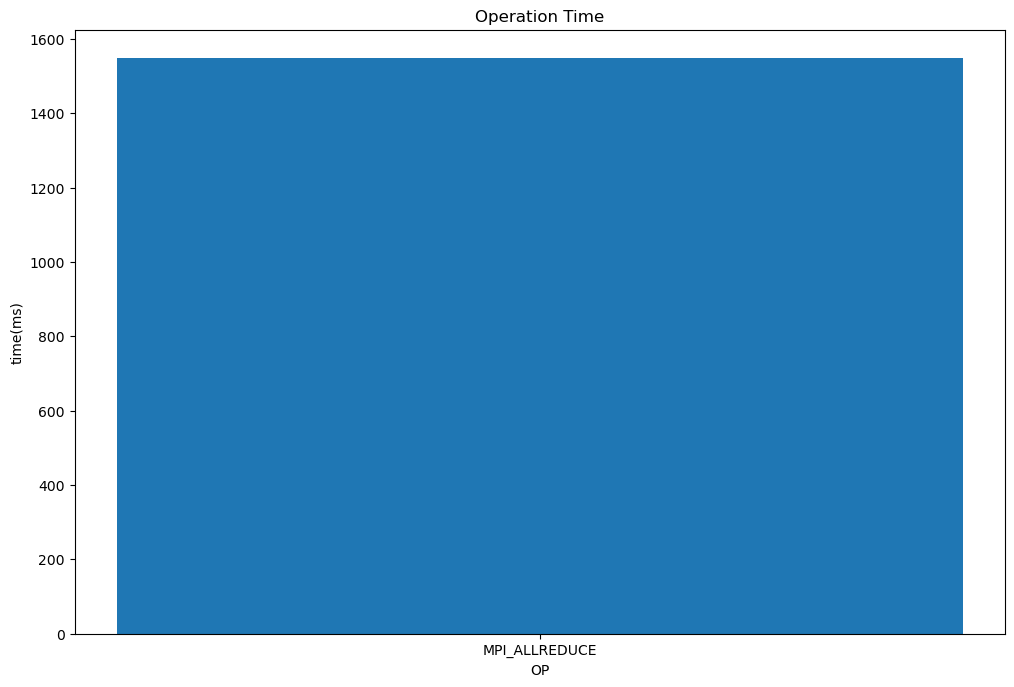

In [85]:
ops = ['MPI_ALLREDUCE']
t = [1547.685]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()

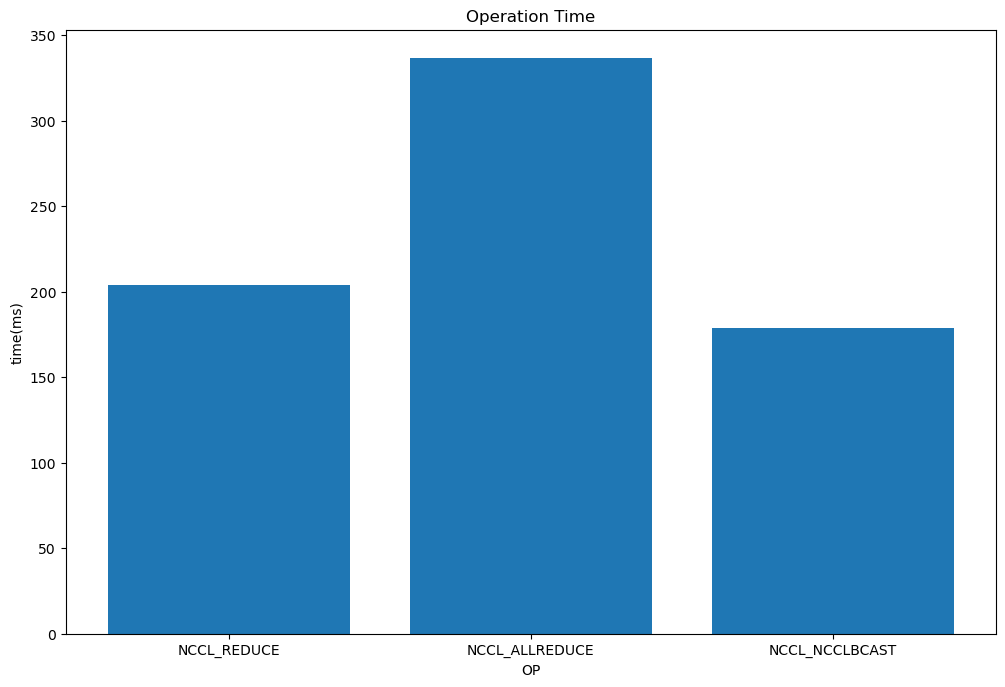

In [86]:
ops = ['NCCL_REDUCE', 'NCCL_ALLREDUCE', 'NCCL_NCCLBCAST']
t = [204.035, 336.320, 178.525]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()

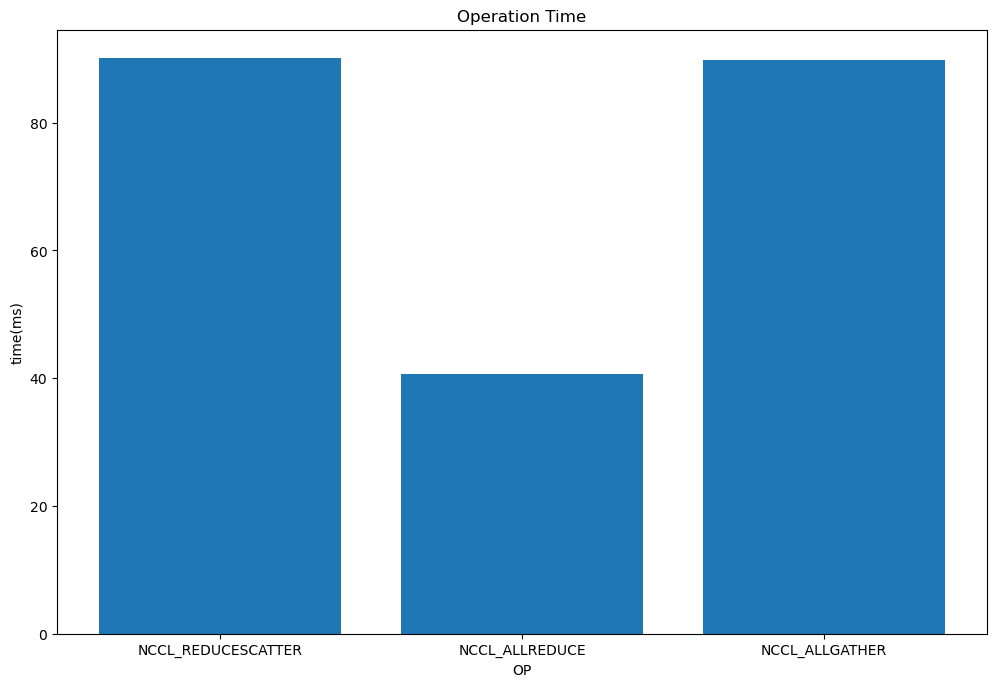

In [87]:
ops = ['NCCL_REDUCESCATTER', 'NCCL_ALLREDUCE', 'NCCL_ALLGATHER']
t = [90.053, 40.737, 89.783]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()

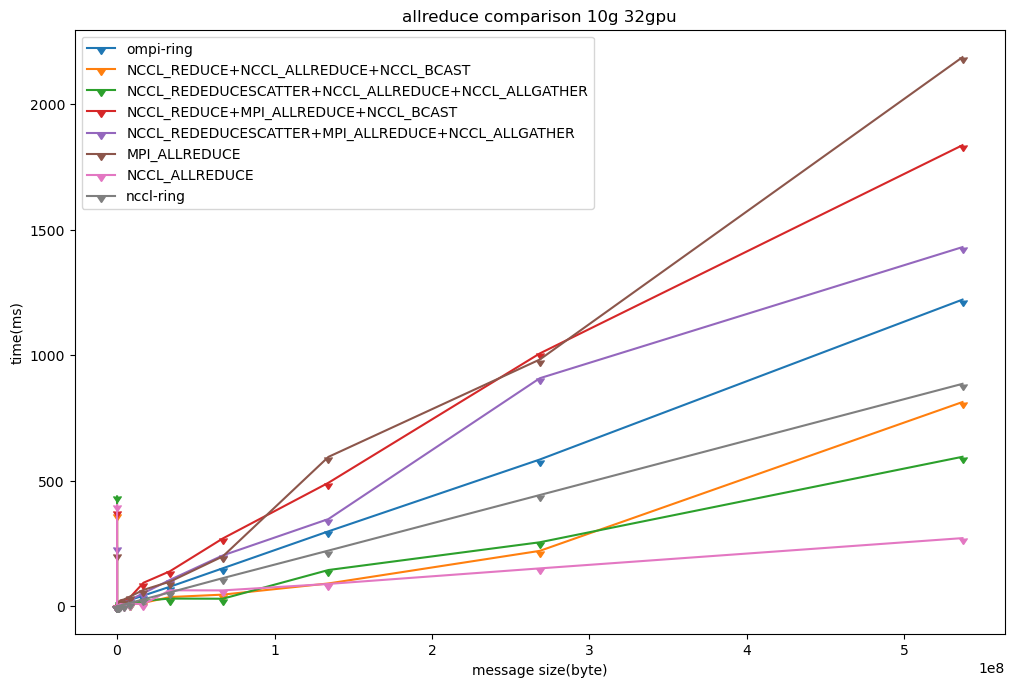

In [99]:
x, y = read_algo_with_head('data/ompi-32gpu-results/32gpus/10g/algo4-stepexp2.txt')
y = y * 1e-3 # convert us to ms # 1us=10^(-3)ms


x7, y7 = read_algo_skip_head('data/nccl-results/nccl-32gpus/10g-stepexp2-2.txt', 707)
y7 = y7 * 1e-3 # convert us to ms


x1, y1 = read_hvd2("./data/horovod-results/32gpu/10g/nccl-slow-2.txt")
x2, y2 = read_hvd2("./data/horovod-results/32gpu/10g/nccl-fast-2.txt")

x3, y3 = read_hvd2("./data/horovod-results/32gpu/10g/mpi-slow-2.txt")
x4, y4 = read_hvd2("./data/horovod-results/32gpu/10g/mpi-fast-2.txt")

x5, y5 = read_hvd2("./data/horovod-results/32gpu/10g/mpi-only-2.txt")
x6, y6 = read_hvd2("./data/horovod-results/32gpu/10g/nccl-only-2.txt")


plt.plot(x,y, marker=11, label='ompi-ring')
plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_ALLREDUCE')


plt.plot(x7,y7, marker=11, label='nccl-ring')


plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 10g 32gpu')
plt.show()



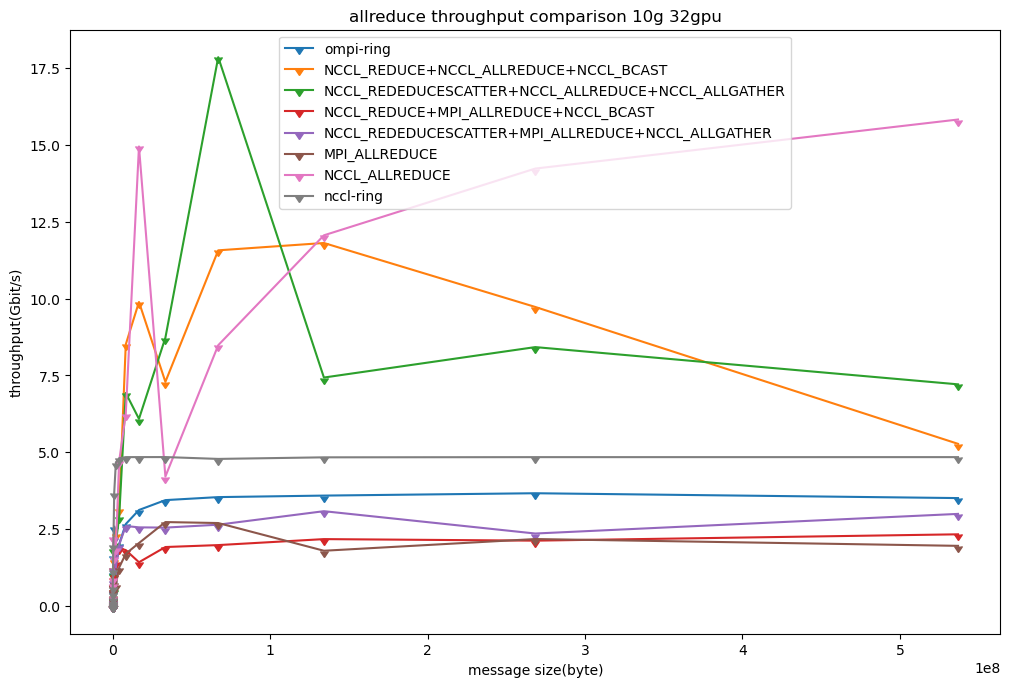

In [101]:
z  = (x * 8 * 1e-6)/y
z1 = (x1 * 8 * 1e-6)/y1
z2 = (x2 * 8 * 1e-6)/y2
z3 = (x3 * 8 * 1e-6)/y3
z4 = (x4 * 8 * 1e-6)/y4
z5 = (x5 * 8 * 1e-6)/y5
z6 = (x6 * 8 * 1e-6)/y6
z7 = (x7 * 8 * 1e-6)/y7

plt.plot(x,z, marker=11, label='ompi-ring')

plt.plot(x1,z1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,z2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,z3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,z4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x5,z5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,z6, marker=11, label='NCCL_ALLREDUCE')

plt.plot(x7,z7, marker=11, label='nccl-ring')



plt.xlabel('message size(byte)')
plt.ylabel('throughput(Gbit/s)')
plt.legend()
# mpi_allreduce
plt.title('allreduce throughput comparison 10g 32gpu')
plt.show()

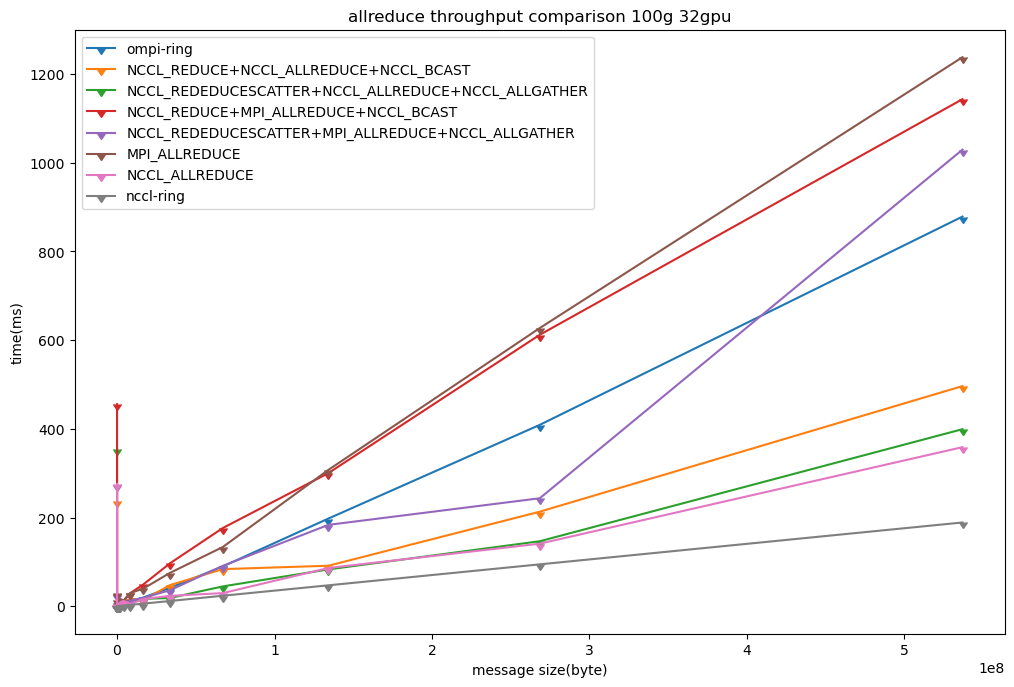

In [13]:
x, y = read_algo_with_head('./data/ompi-32gpu-results/32gpus/100g/algo4-stepexp2.txt')
y = y * 1e-3


x1, y1 = read_hvd2("./data/horovod-results/32gpu/100g/nccl-slow-2.txt")
x2, y2 = read_hvd2("./data/horovod-results/32gpu/100g/nccl-fast-2.txt")

x3, y3 = read_hvd2("./data/horovod-results/32gpu/100g/mpi-slow-2.txt")
x4, y4 = read_hvd2("./data/horovod-results/32gpu/100g/mpi-fast-2.txt")

x5, y5 = read_hvd2("./data/horovod-results/32gpu/100g/mpi-only-2.txt")
x6, y6 = read_hvd2("./data/horovod-results/32gpu/100g/nccl-only02.txt")

x7, y7 = read_algo_skip_head('data/nccl-results/nccl-32gpus/100g-stepexp2-2.txt', 723)
y7 = y7 * 1e-3


plt.plot(x,y, marker=11, label='ompi-ring')
plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_ALLREDUCE')

plt.plot(x7,y7, marker=11, label='nccl-ring')




plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce throughput comparison 100g 32gpu')
plt.show()

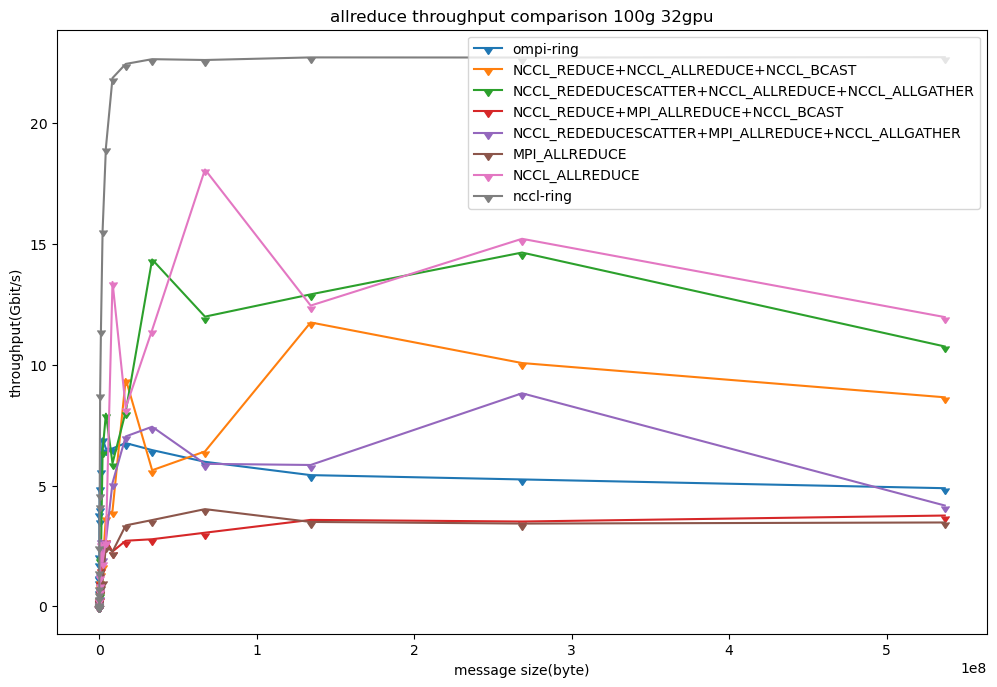

In [14]:
z  = (x * 8 * 1e-6)/y
z1 = (x1 * 8 * 1e-6)/y1
z2 = (x2 * 8 * 1e-6)/y2
z3 = (x3 * 8 * 1e-6)/y3
z4 = (x4 * 8 * 1e-6)/y4
z5 = (x5 * 8 * 1e-6)/y5
z6 = (x6 * 8 * 1e-6)/y6
z7 = (x7 * 8 * 1e-6)/y7

plt.plot(x,z, marker=11, label='ompi-ring')

plt.plot(x1,z1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,z2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,z3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,z4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x5,z5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,z6, marker=11, label='NCCL_ALLREDUCE')

plt.plot(x7,z7, marker=11, label='nccl-ring')



plt.xlabel('message size(byte)')
plt.ylabel('throughput(Gbit/s)')
plt.legend()
# mpi_allreduce
plt.title('allreduce throughput comparison 100g 32gpu')
plt.show()

28
28
28


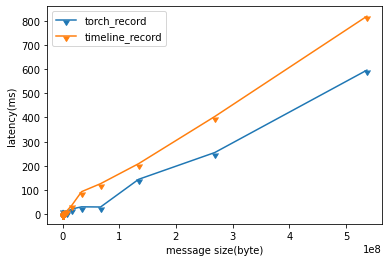

In [12]:
x, y2 = read_hvd2("./data/horovod-results/32gpu/10g/nccl-fast-2.txt")
print(len(x))
print(len(y2))

y0= [5306.448, 2.398, 1.591, 1.575, 1.525, 1.647, 1.583, 1.616, 1.569, 1.438, 1.6, 1.534, 1.609, 1.584, 1.644, 2.248, 2.597, 5.097, 4.429, 11.879, 8.065, 15.965, 38.448, 93.345, 126.482, 209.177, 403.845, 818.350]
print(len(y0))

plt.plot(x[1:],y2[1:], marker=11, label='torch_record')
plt.plot(x[1:],y0[1:], marker=11, label='timeline_record')
plt.xlabel('message size(byte)')
plt.ylabel('latency(ms)')

plt.legend()
plt.show()

In [42]:
import json

def read_ts(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
        
        time_diff = []
        
        for i in range(1,29):
            small = 1e9
            large = 0
            for j in data:
                if j['pid'] == i and 'ts' in j:
                    if j['ts'] > large:
                        large = j['ts']
                    if j['ts'] < small:
                        small = j['ts']

            time_diff.append(float(large-small)*1e-3)
                
    return time_diff

ts = read_ts('./data/horovod-results/32gpu/logs/10g-nccl-fast.json')

print(ts)

[5201.189, 2.435, 2.491, 2.4, 2.375, 2.408, 2.427, 2.431, 2.4250000000000003, 2.43, 2.4050000000000002, 2.437, 2.44, 2.431, 3.484, 2.448, 3.6710000000000003, 2.668, 16.642, 9.65, 11.544, 12.188, 24.135, 36.308, 88.287, 246.698, 410.137, 815.85]


In [126]:
import time

start = time.time()
print("hello")
print(start)
end = time.time()
print(end - start)


hello
1625042226.8307543
0.00032830238342285156


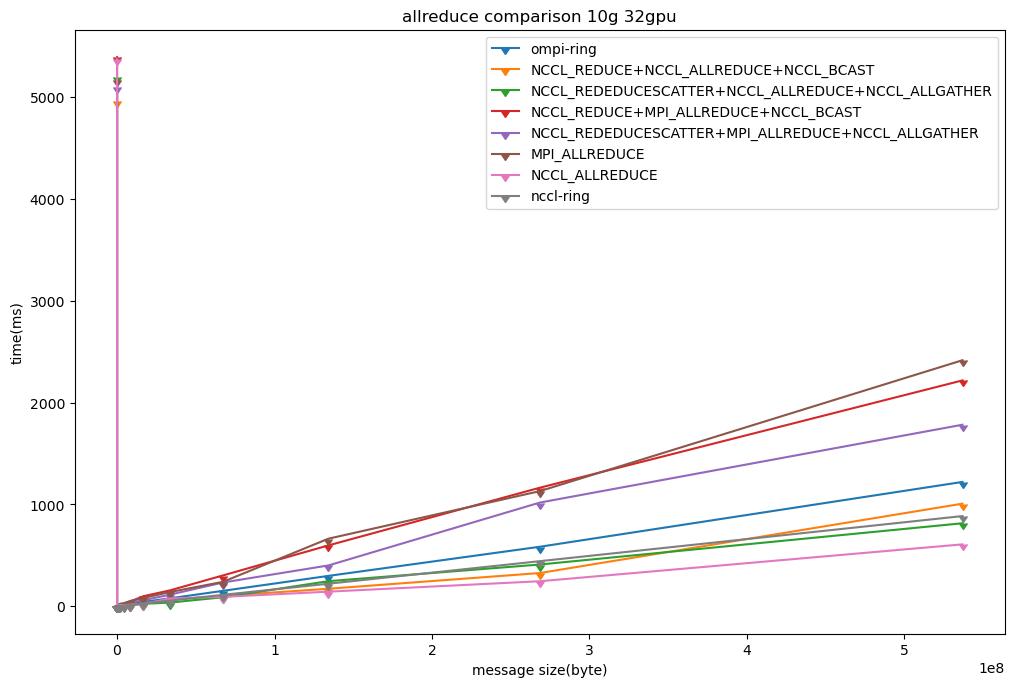

In [44]:
x, y = read_algo_with_head('data/ompi-32gpu-results/32gpus/10g/algo4-stepexp2.txt')
y = y * 1e-3 # convert us to ms # 1us=10^(-3)ms


x7, y7 = read_algo_skip_head('data/nccl-results/nccl-32gpus/10g-stepexp2-2.txt', 707)
y7 = y7 * 1e-3 # convert us to ms


x1, y1 = read_hvd2("./data/horovod-results/32gpu/10g/nccl-slow-2.txt")
y1 = read_ts('./data/horovod-results/32gpu/logs/10g-nccl-slow.json')
x2, y2 = read_hvd2("./data/horovod-results/32gpu/10g/nccl-fast-2.txt")
y2 = read_ts('./data/horovod-results/32gpu/logs/10g-nccl-fast.json')

x3, y3 = read_hvd2("./data/horovod-results/32gpu/10g/mpi-slow-2.txt")
y3 = read_ts('./data/horovod-results/32gpu/logs/10g-mpi-slow.json')

x4, y4 = read_hvd2("./data/horovod-results/32gpu/10g/mpi-fast-2.txt")
y4 = read_ts('./data/horovod-results/32gpu/logs/10g-mpi-fast.json')

x5, y5 = read_hvd2("./data/horovod-results/32gpu/10g/mpi-only-2.txt")
y5 = read_ts('./data/horovod-results/32gpu/logs/10g-mpi-only.json')

x6, y6 = read_hvd2("./data/horovod-results/32gpu/10g/nccl-only-2.txt")
y6 = read_ts('./data/horovod-results/32gpu/logs/10g-nccl-only.json')


plt.plot(x,y, marker=11, label='ompi-ring')
plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_ALLREDUCE')


plt.plot(x7,y7, marker=11, label='nccl-ring')


plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 10g 32gpu')
plt.show()



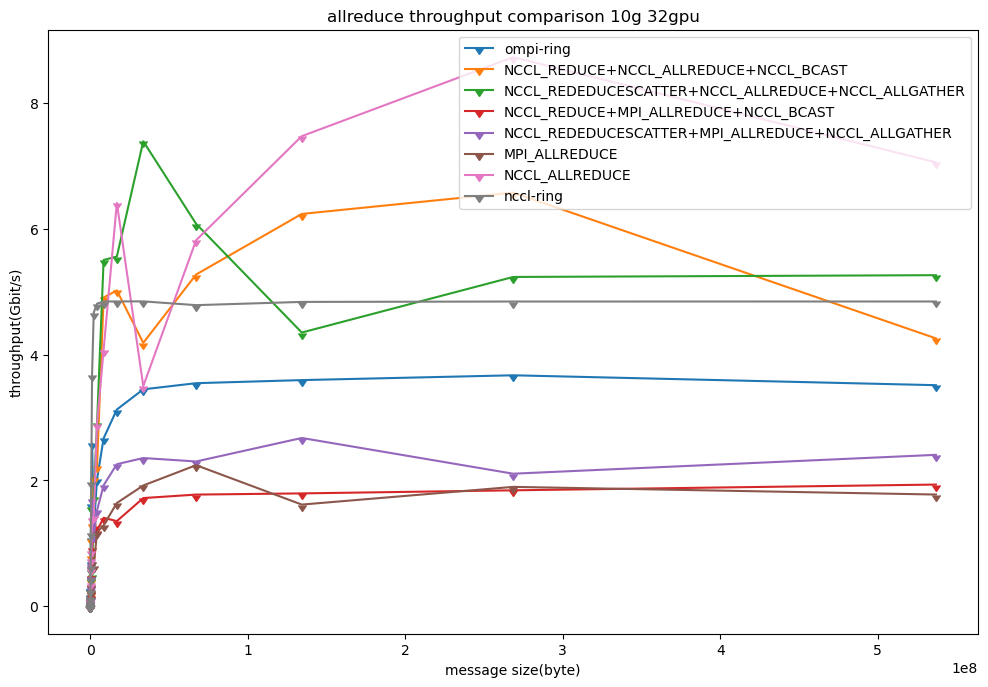

In [45]:
z  = (x * 8 * 1e-6)/y
z1 = (x1 * 8 * 1e-6)/y1
z2 = (x2 * 8 * 1e-6)/y2
z3 = (x3 * 8 * 1e-6)/y3
z4 = (x4 * 8 * 1e-6)/y4
z5 = (x5 * 8 * 1e-6)/y5
z6 = (x6 * 8 * 1e-6)/y6
z7 = (x7 * 8 * 1e-6)/y7

plt.plot(x,z, marker=11, label='ompi-ring')

plt.plot(x1,z1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,z2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,z3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,z4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x5,z5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,z6, marker=11, label='NCCL_ALLREDUCE')

plt.plot(x7,z7, marker=11, label='nccl-ring')



plt.xlabel('message size(byte)')
plt.ylabel('throughput(Gbit/s)')
plt.legend()
# mpi_allreduce
plt.title('allreduce throughput comparison 10g 32gpu')
plt.show()

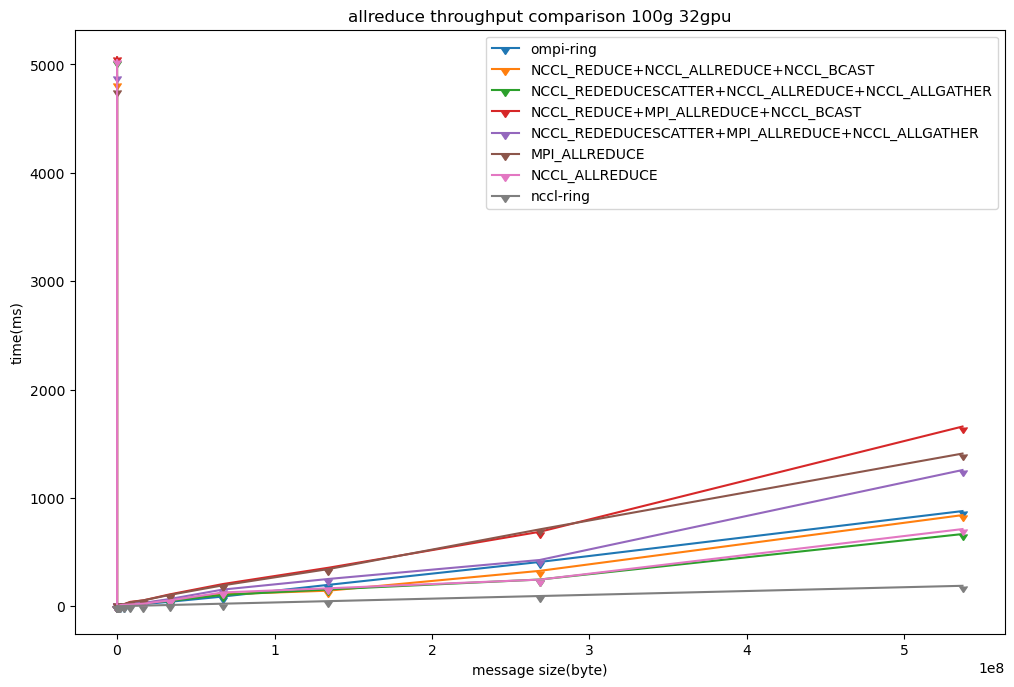

In [48]:
x, y = read_algo_with_head('./data/ompi-32gpu-results/32gpus/100g/algo4-stepexp2.txt')
y = y * 1e-3


x1, y1 = read_hvd2("./data/horovod-results/32gpu/100g/nccl-slow-2.txt")
y1 = read_ts('./data/horovod-results/32gpu/logs/100g-nccl-slow.json')
x2, y2 = read_hvd2("./data/horovod-results/32gpu/100g/nccl-fast-2.txt")
y2 = read_ts('./data/horovod-results/32gpu/logs/100g-nccl-fast.json')

x3, y3 = read_hvd2("./data/horovod-results/32gpu/100g/mpi-slow-2.txt")
y3 = read_ts('./data/horovod-results/32gpu/logs/100g-mpi-slow.json')

x4, y4 = read_hvd2("./data/horovod-results/32gpu/100g/mpi-fast-2.txt")
y4 = read_ts('./data/horovod-results/32gpu/logs/100g-mpi-fast.json')

x5, y5 = read_hvd2("./data/horovod-results/32gpu/100g/mpi-only-2.txt")
y5 = read_ts('./data/horovod-results/32gpu/logs/100g-mpi-only.json')

x6, y6 = read_hvd2("./data/horovod-results/32gpu/100g/nccl-only02.txt")
y6 = read_ts('./data/horovod-results/32gpu/logs/100g-nccl-only.json')

x7, y7 = read_algo_skip_head('data/nccl-results/nccl-32gpus/100g-stepexp2-2.txt', 723)
y7 = y7 * 1e-3




plt.plot(x,y, marker=11, label='ompi-ring')
plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_ALLREDUCE')

plt.plot(x7,y7, marker=11, label='nccl-ring')




plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce throughput comparison 100g 32gpu')
plt.show()

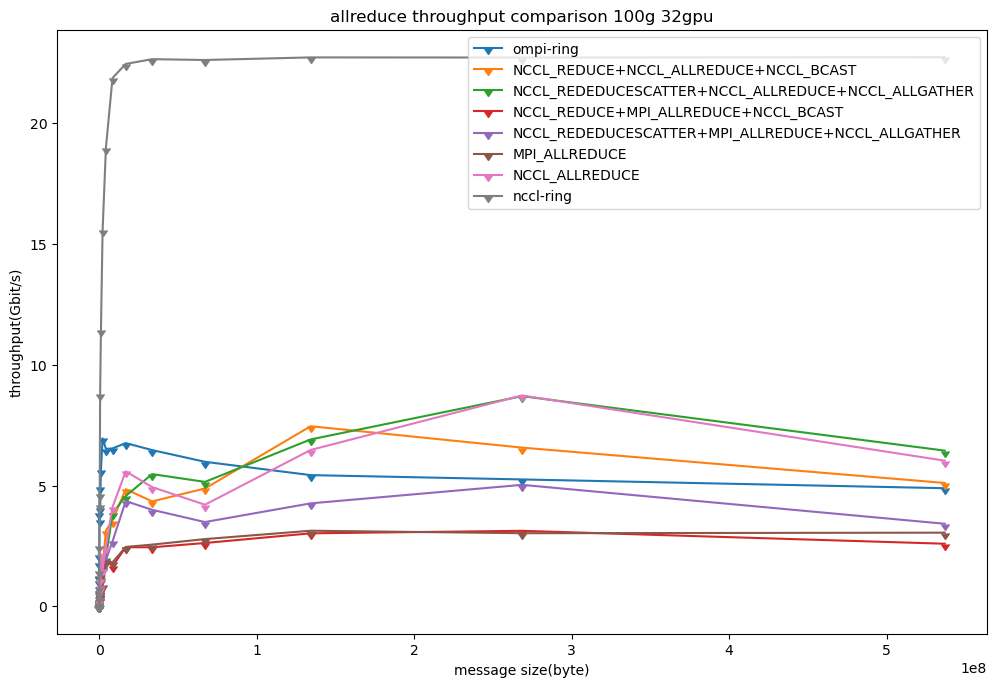

In [49]:
z  = (x * 8 * 1e-6)/y
z1 = (x1 * 8 * 1e-6)/y1
z2 = (x2 * 8 * 1e-6)/y2
z3 = (x3 * 8 * 1e-6)/y3
z4 = (x4 * 8 * 1e-6)/y4
z5 = (x5 * 8 * 1e-6)/y5
z6 = (x6 * 8 * 1e-6)/y6
z7 = (x7 * 8 * 1e-6)/y7

plt.plot(x,z, marker=11, label='ompi-ring')

plt.plot(x1,z1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,z2, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x3,z3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,z4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')

plt.plot(x5,z5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,z6, marker=11, label='NCCL_ALLREDUCE')

plt.plot(x7,z7, marker=11, label='nccl-ring')



plt.xlabel('message size(byte)')
plt.ylabel('throughput(Gbit/s)')
plt.legend()
# mpi_allreduce
plt.title('allreduce throughput comparison 100g 32gpu')
plt.show()

In [50]:
yy = read_ts('./data/horovod-results/32gpu/logs/10g-nccl-slow.json')
print(yy)
yy = read_ts('./data/horovod-results/32gpu/logs/100g-nccl-slow.json')
print(yy)

[4966.785, 2.44, 2.433, 2.437, 2.382, 2.378, 2.5, 2.49, 2.388, 1.412, 2.371, 2.387, 2.399, 2.474, 2.479, 2.5500000000000003, 2.6270000000000002, 3.8970000000000002, 6.4270000000000005, 8.235, 15.006, 13.669, 26.728, 64.08800000000001, 101.778, 172.123, 326.468, 1008.268]
[4832.045, 3.471, 2.407, 2.419, 2.408, 2.399, 2.395, 2.406, 2.407, 2.399, 2.4, 2.406, 2.416, 2.3930000000000002, 2.418, 2.465, 2.606, 3.862, 6.383, 10.31, 10.702, 18.904, 27.69, 61.825, 110.078, 144.038, 326.916, 841.314]


In [ ]:
p